In [1]:
#Linear regression assumptions
# Linearity
# Normality
# Homoscedasticity

In [1]:
import os
import pandas as pd
import numpy
import seaborn as sns
from scipy.stats.mstats import winsorize
import numpy as np
from scipy.stats import chi2
from scipy.stats import shapiro
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import kstest
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [2]:
# Set dir
os.getcwd()
os.chdir('/Users/[REDACTED]/Desktop')
os.getcwd()

In [3]:
# Import Dataset, display pandas to max rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df1 = pd.read_excel('[REDACTED].xlsx')
display(df1)

<AxesSubplot:>

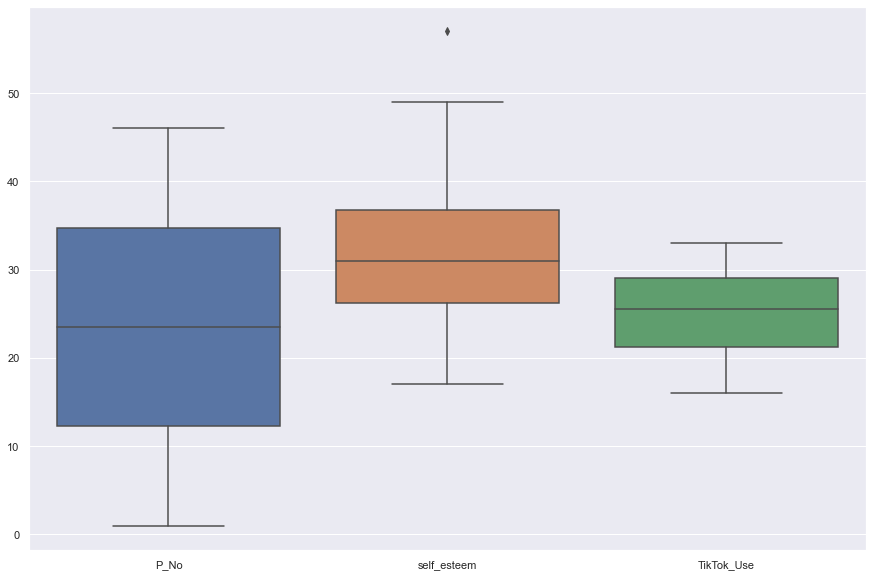

In [6]:
# Outliers - only 1 outlier - should probably get rid of but cba
sns.set(rc={"figure.figsize":(15, 10)})
sns.boxplot(data = df1)


ShapiroResult(statistic=0.9637439250946045, pvalue=0.16019608080387115)

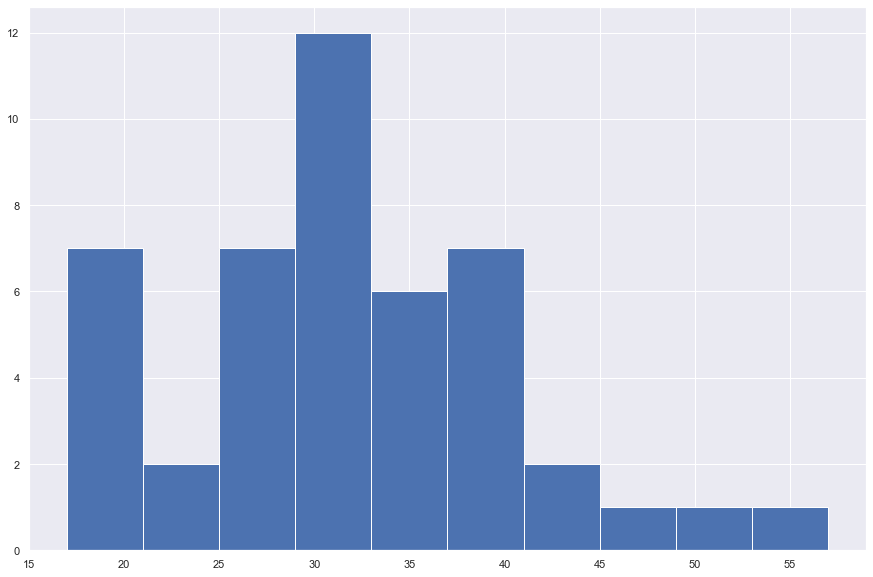

In [8]:
# Normality
plt.hist(df1['self_esteem'])
shapiro(df1['self_esteem'])

ShapiroResult(statistic=0.9503260850906372, pvalue=0.048271212726831436)

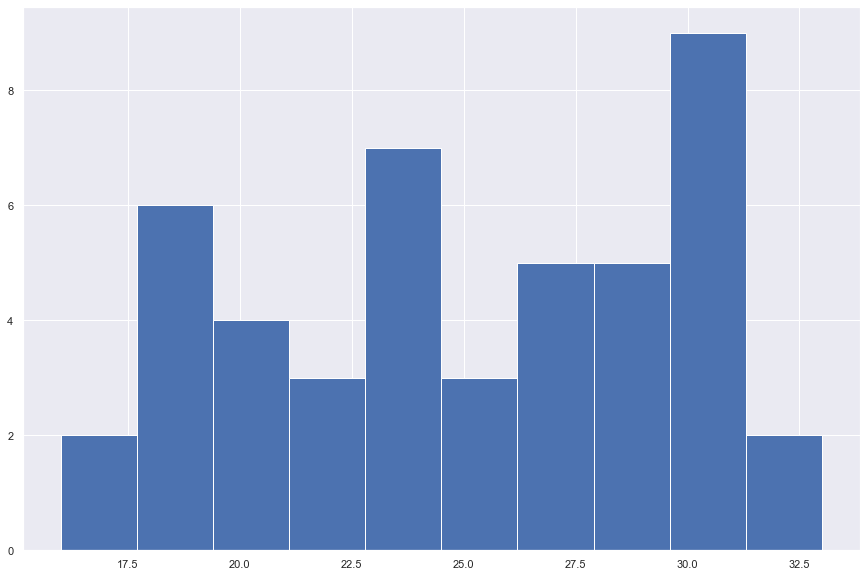

In [9]:
plt.hist(df1['TikTok_Use'])
shapiro(df1['TikTok_Use'])

In [21]:
#Linearity 
pearsonr(df1['self_esteem'], df1['TikTok_Use'])

(-0.14304555500918786, 0.3429404143643871)

In [22]:
pearsonr(df1['TikTok_Use'], df1['self_esteem'])

(-0.14304555500918786, 0.3429404143643871)

array([[<AxesSubplot:xlabel='P_No', ylabel='P_No'>,
        <AxesSubplot:xlabel='self_esteem', ylabel='P_No'>,
        <AxesSubplot:xlabel='TikTok_Use', ylabel='P_No'>],
       [<AxesSubplot:xlabel='P_No', ylabel='self_esteem'>,
        <AxesSubplot:xlabel='self_esteem', ylabel='self_esteem'>,
        <AxesSubplot:xlabel='TikTok_Use', ylabel='self_esteem'>],
       [<AxesSubplot:xlabel='P_No', ylabel='TikTok_Use'>,
        <AxesSubplot:xlabel='self_esteem', ylabel='TikTok_Use'>,
        <AxesSubplot:xlabel='TikTok_Use', ylabel='TikTok_Use'>]],
      dtype=object)

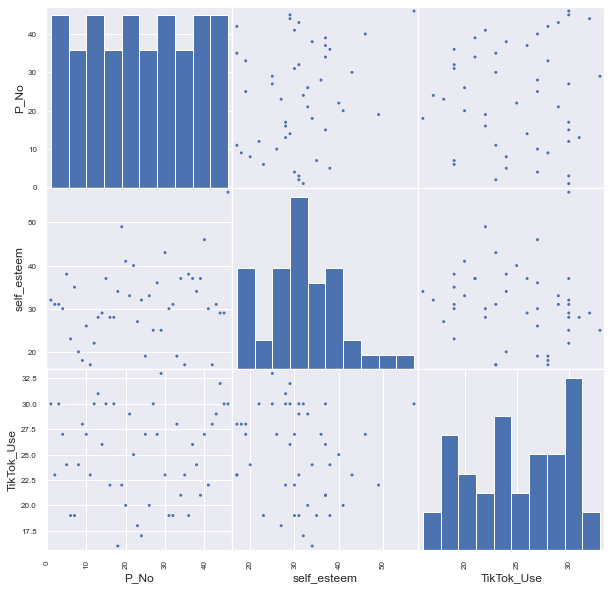

In [23]:
#Linearity
pd.plotting.scatter_matrix(df1,
                           alpha = 1, figsize = [10, 10])

In [20]:
# OLS Regression given it's all violated anyway
import statsmodels.formula.api as smf
regression = smf.ols('self_esteem ~ TikTok_Use', data=df1).fit()
print(regression.summary())

                            OLS Regression Results                            
Dep. Variable:            self_esteem   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.9191
Date:                Wed, 13 Apr 2022   Prob (F-statistic):              0.343
Time:                        13:19:33   Log-Likelihood:                -163.26
No. Observations:                  46   AIC:                             330.5
Df Residuals:                      44   BIC:                             334.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.8103      7.149      5.289      0.0